In [25]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 7.2 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.1 MB 5.1 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/11.1 MB 5.0 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/11.1 MB 5.0 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.1 MB 3.9 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.1 MB 4.1 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 4.4 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 4.6 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 4.6 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 4.6 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 4.6 MB/s eta 0:00:01
   -----------

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [7]:
df=pd.read_csv(url)

In [9]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
508,2014,HYUNDAI,SANTA FE,SUV - SMALL,3.3,6,A6,X,13.0,9.1,11.2,25,258
742,2014,MERCEDES-BENZ,E 350 4MATIC COUPE,SUBCOMPACT,3.5,6,AS7,Z,11.9,8.5,10.4,27,239
910,2014,RAM,1500 (MDS),PICKUP TRUCK - STANDARD,5.7,8,A8,X,15.8,10.9,13.6,21,313
352,2014,FORD,EDGE,SUV - SMALL,2.0,4,A6,X,11.3,7.9,9.8,29,225
1034,2014,VOLKSWAGEN,JETTA,COMPACT,1.8,4,A6,X,9.5,6.7,8.2,34,189


In [10]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [11]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
926,6.7,12,17.1,393
679,3.5,6,12.8,294
167,3.6,6,11.3,260
766,5.5,8,15.5,356
160,2.0,4,10.1,232
810,1.6,4,8.3,191
31,4.0,8,11.3,260
459,4.3,6,17.8,285
1049,2.0,4,6.8,184


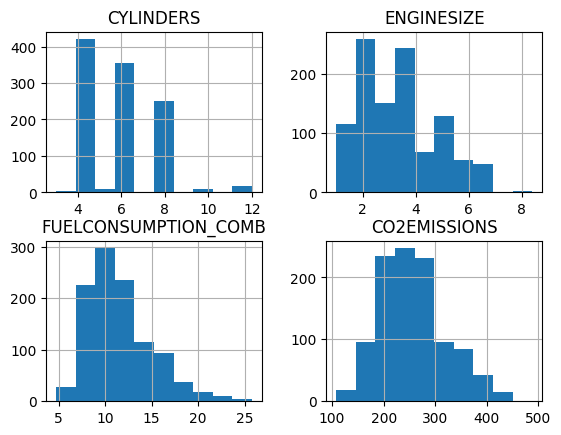

In [13]:
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

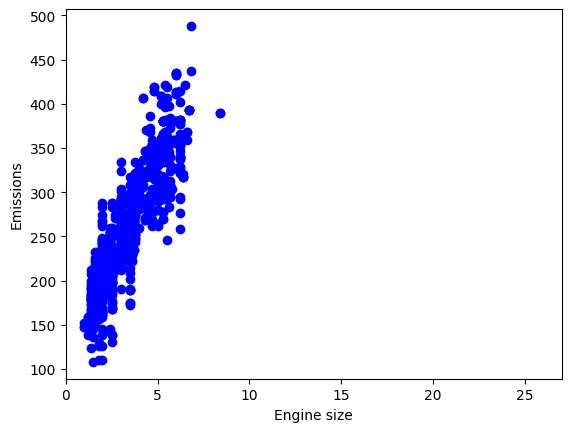

In [15]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emissions")
plt.xlim(0,27)
plt.show()

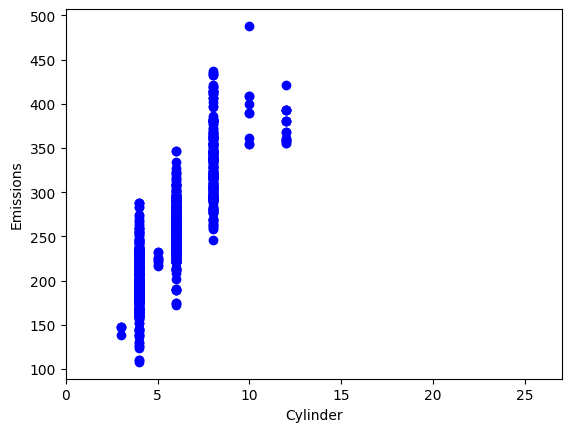

In [18]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emissions")
plt.xlim(0,27)
plt.show()

In [36]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [38]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853,), (853,))

In [39]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()

regressor.fit(X_train.reshape(-1,1), y_train)

print('Coefficients: ', regressor.coef_[0])
print('Intercept: ', regressor.intercept_)

Coefficients:  38.992978724434074
Intercept:  126.28970217408721


Text(0, 0.5, 'Emission')

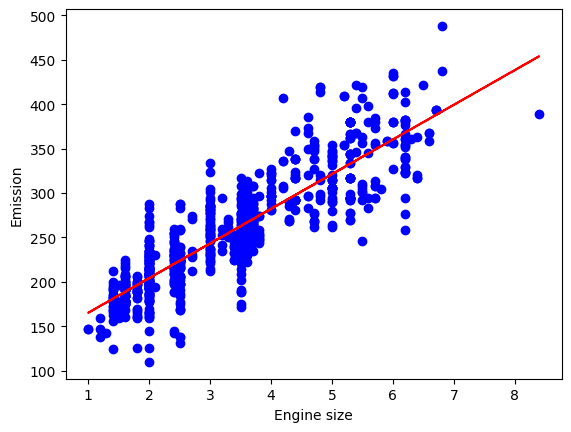

In [40]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test_ = regressor.predict(X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


Text(0, 0.5, 'Emission')

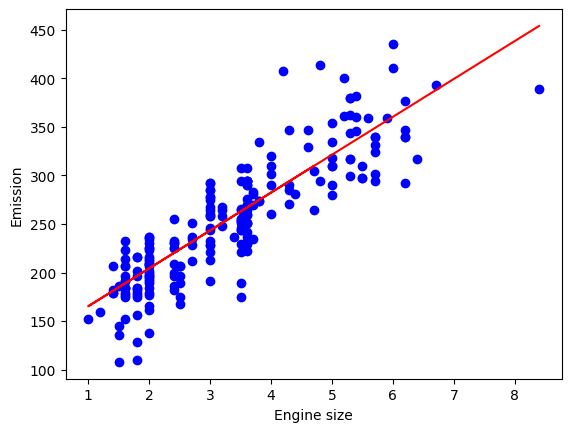

In [43]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [51]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [53]:
regr = linear_model.LinearRegression()
regr.fit(X_train.reshape(-1, 1), y_train)

print('Coefficients: ', regr.coef_[0])
print('Intercept: ', regr.intercept_)

Coefficients:  16.18090078119919
Intercept:  69.10302617988452


In [54]:
y_test_ = regr.predict(X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 20.44
Mean squared error: 797.43
Root mean squared error: 28.24
R2-score: 0.81
